In [1]:
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs

from sys import path
path.append('../mloceanbl/')
import data
import models

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
}

plt.rcParams.update(tex_fonts)
width = 397.48499

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
# Select a certain lat, lon region
lat_bounds = np.array([-10, 10])
lat_bounds1 = np.array([-45, -35])
lon_bounds = np.array([-150, -120])
lon_bounds1 = np.array([60, 120])

title_label = '10S-10N 120W-150W'
fig_label = '10S_10N_120W_150W'
title_label1 = '45S-35S 60E-120E'
fig_label1 = '45S_35S_60E_120E'
# # Create the dataset
dataset = data.dataset(lat_bounds, lon_bounds)
time = dataset.time
# Normalize data according to training data
dataset.normalize()

# Obtain the indices for the train/test/val split (determined during preprocessing)
i_train, i_test, i_val = dataset.i_train, dataset.i_test, dataset.i_val

with xr.open_dataset('mldbmax_full_anomalies_weekly1.nc') as ds:
    print(ds)
    mldb = ds.copy()
    y_week = mldb['week']

with xr.open_dataset('mldb_climatology_weekly1.nc') as ds:
    print(ds)
    mldb_clim = ds.copy()

<xarray.Dataset>
Dimensions:              (lat: 230, lon: 720, testing_index: 25, time: 200, training_index: 150, validation_index: 25)
Coordinates:
  * time                 (time) datetime64[ns] 2011-08-26T12:00:00 ... 2015-06-19T12:00:00
  * lat                  (lat) float32 -54.75 -54.25 -53.75 ... 59.25 59.75
  * lon                  (lon) float32 -179.75 -179.25 -178.75 ... 179.25 179.75
  * training_index       (training_index) int64 1 2 3 4 5 ... 196 197 198 199
  * testing_index        (testing_index) int64 13 18 27 30 ... 158 173 181 182
  * validation_index     (validation_index) int64 0 8 9 15 ... 157 164 183 195
Data variables:
    salinity             (time, lat, lon) float32 ...
    salinity_anomaly     (time, lat, lon) float32 ...
    temperature          (time, lat, lon) float32 ...
    temperature_anomaly  (time, lat, lon) float32 ...
    height               (time, lat, lon) float64 ...
<xarray.Dataset>
Dimensions:      (index: 451295)
Coordinates:
  * index        (

In [5]:
###################### Tropical Pacific ##################################################
m_f = mldb.mldb.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_a = mldb.anomaly.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_a_s = mldb.std_anomaly.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

m_time = mldb.time.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

m_lat = mldb.lat.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_lon = mldb.lon.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

m_week = mldb.week.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

#################### Southern Indian ######################################################
m_f1 = mldb.mldb.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_a1 = mldb.anomaly.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_a_s1 = mldb.std_anomaly.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

m_time1 = mldb.time.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

m_lat1 = mldb.lat.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_lon1 = mldb.lon.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

m_week1 = mldb.week.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

In [6]:
y_f = np.zeros(200)
y_a = np.zeros(200)
y_a_s = np.zeros(200)
y_clim = np.zeros(200)
y_clim_std = np.zeros(200)
for j in range(200):
    y_f[j] = m_f.where(np.in1d(m_week, time[j])).dropna('index').mean().values
    y_a[j] = m_a.where(np.in1d(m_week, time[j])).dropna('index').mean().values
    y_a_s[j] = m_a_s.where(np.in1d(m_week, time[j])).dropna('index').mean().values
    vals = mldb_clim.climatology[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0]), 
                                      (mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0]),
                                      j].values
    y_clim[j] = np.nanmean(vals[vals>0])
    vals = mldb_clim.climatology_std[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0]), 
                                      (mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0]),
                                      j].values
    y_clim_std[j] = np.nanmean(vals[vals>0])
    
y_f1 = np.zeros(200)
y_a1 = np.zeros(200)
y_a_s1 = np.zeros(200)
y_clim1 = np.zeros(200)
y_clim_std1 = np.zeros(200)
for j in range(200):
    y_f1[j] = m_f1.where(np.in1d(m_week1, time[j])).dropna('index').mean().values
    y_a1[j] = m_a1.where(np.in1d(m_week1, time[j])).dropna('index').mean().values
    y_a_s1[j] = m_a_s1.where(np.in1d(m_week1, time[j])).dropna('index').mean().values
    vals = mldb_clim.climatology[(mldb_clim.lon < lon_bounds1[1]) & (mldb_clim.lon > lon_bounds1[0]), 
                                      (mldb_clim.lat < lat_bounds1[1]) & (mldb_clim.lat > lat_bounds1[0]),
                                      j].values
    y_clim1[j] = np.nanmean(vals[vals>0])
    vals = mldb_clim.climatology_std[(mldb_clim.lon < lon_bounds1[1]) & (mldb_clim.lon > lon_bounds1[0]), 
                                      (mldb_clim.lat < lat_bounds1[1]) & (mldb_clim.lat > lat_bounds1[0]),
                                      j].values
    y_clim_std1[j] = np.nanmean(vals[vals>0])

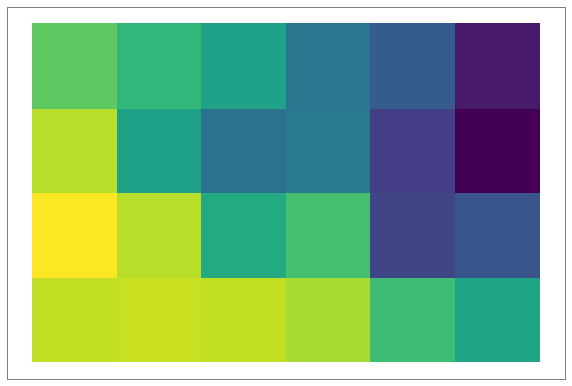

In [7]:
m_clim = mldb_clim.climatology[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0]), 
                                      (mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0]),
                                      40].values
lon = mldb_clim.lon[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0])].values
lat = mldb_clim.lat[(mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0])].values
[LON, LAT] = np.meshgrid(lon, lat, indexing='ij')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.pcolormesh(LON, LAT, m_clim, transform=ccrs.PlateCarree())

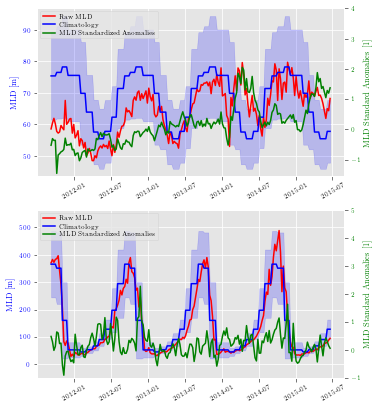

In [9]:
from matplotlib.cm import get_cmap
cmap = get_cmap('tab10')

fig = plt.figure(figsize=set_size(width, subplots=(2,1)))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

plot1 = ax.plot(time[2:], y_f[2:], color='r', label = 'Raw MLD')
plot1a = ax.plot(time[2:], y_clim[2:], color='b', label = 'Climatology')
plot1b = ax.fill_between(time[2:], y_clim[2:] + y_clim_std[2:], y_clim[2:] - y_clim_std[2:], color='b', alpha = 0.2)
ax.set_ylabel('MLD [m]', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.tick_params(axis='x', labelrotation=30, labelcolor='k')

# ax.set_ylim(y_f.min()-15, y_f.max()+5)

ax1 = ax.twinx()
plot2 = ax1.plot(time[2:], y_a_s[2:], color = 'g', label = 'MLD Standardized Anomalies')
ax1.set_ylabel('MLD Standard Anomalies [1]', color='g', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_ylim(y_a_s.min()-0.1,4)

lns = plot1+plot1a+plot2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc = 'upper left')
plt.grid(False)
######################################################################################################
######################################################################################################
plot1 = ax2.plot(time[2:], y_f1[2:], color='r', label = 'Raw MLD')
plot1a = ax2.plot(time[2:], y_clim1[2:], color='b', label = 'Climatology')
plot1b = ax2.fill_between(time[2:], y_clim1[2:] + y_clim_std1[2:], y_clim1[2:] - y_clim_std1[2:], color='b', alpha = 0.2)
ax2.set_ylabel('MLD [m]', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='x', labelrotation=30, labelcolor='k')

ax2.set_ylim(0.*y_f1.min()-50, y_f1.max()+75)

ax3 = ax2.twinx()
plot2 = ax3.plot(time[2:], y_a_s1[2:], color = 'g', label = 'MLD Standardized Anomalies')
ax3.set_ylabel('MLD Standard Anomalies [1]', color='g', fontweight='bold')
ax3.tick_params(axis='y', labelcolor='g')
ax3.set_ylim(y_a_s1.min()-0.1, 5)

lns = plot1+plot1a+plot2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc = 'upper left')
plt.grid(False)
plt.savefig('mld_' + fig_label + 'full_climatology_stdanomalies.pdf', format='pdf', bbox_inches='tight')
# plt.close()